In [1]:
# !pip install ../../

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

### Config

In [3]:
config = {
    "lr": 3e-5,
    "epochs_num": 15000,
    "batch_size": 64,
    "log_each": 100,
    "device": "cuda:2",
    "z_dim": 16,
    "disc_coef": 3
}

### Data

In [4]:
from generation.dataset.images_dataset import ImageDataset
            
dataset = ImageDataset(0)

Image size: (77, 77, 4)


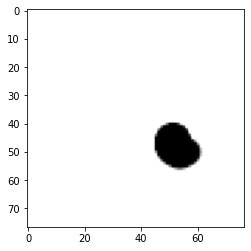

In [5]:
image = dataset[200].numpy()
image = np.transpose(image, (1, 2, 0))
print("Image size:", image.shape)
plt.imshow(image)
plt.show()

### Models

In [6]:
from generation.nets.shapes_2d import Generator, Discriminator

In [7]:
generator = Generator(config)
discriminator = Discriminator(config)

In [8]:
# discriminator = Discriminator(config)
# test_tensor = dataset[0].unsqueeze(0)
# discriminator(test_tensor, debug=True)
# generator = Generator(config)
# test_z = torch.rand(1, config['z_dim'])
# output = generator(test_z, debug=True)
# assert(output.shape == test_tensor.shape)

### Training

In [9]:
from generation.training.wgan_trainer import WganTrainer

In [10]:
g_optimizer = torch.optim.Adam(generator.parameters(), lr=config['lr'])
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=config['lr'])

trainer = WganTrainer(generator, discriminator, g_optimizer, \
                      d_optimizer, config)

wandb: Currently logged in as: whitera2bit (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.1
wandb: Run data is saved locally in wandb/run-20200923_210732-1kkig4qr
wandb: Syncing run sparkling-puddle-123


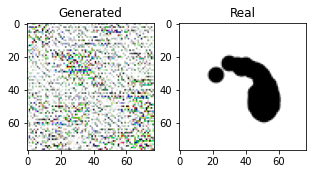

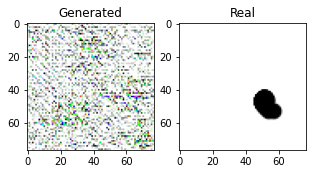

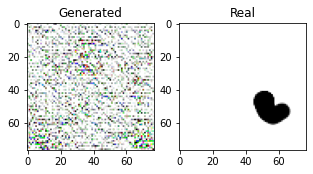

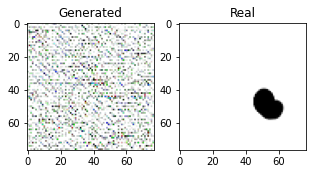

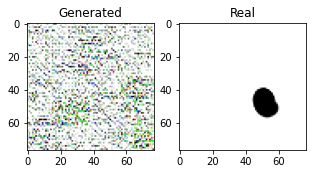

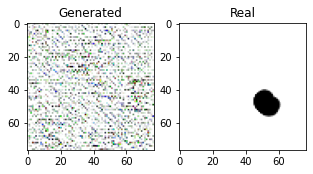

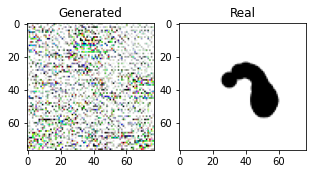

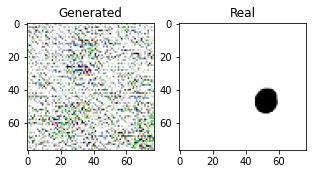

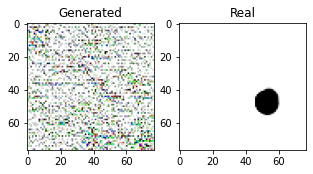

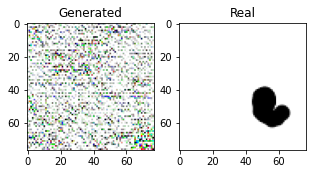

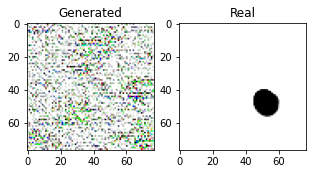

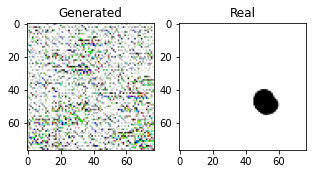

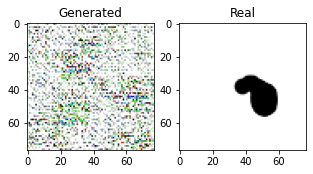

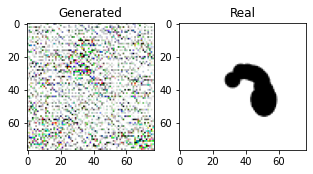

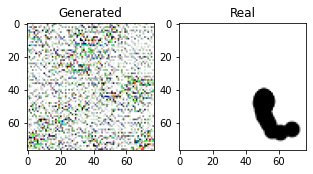

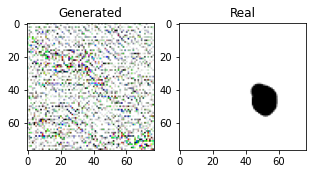

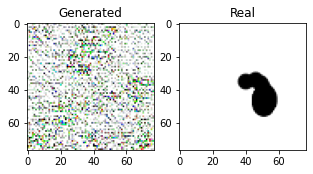

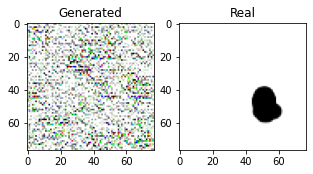

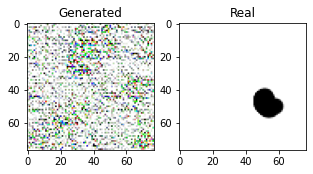

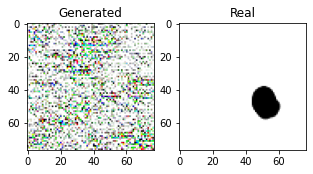

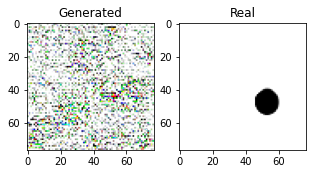

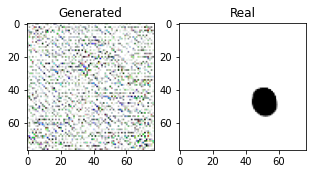

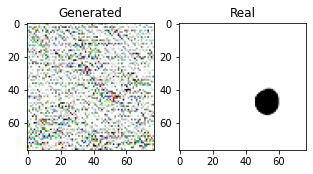

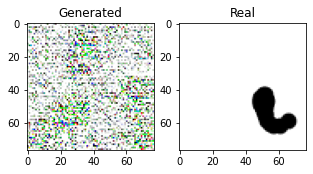

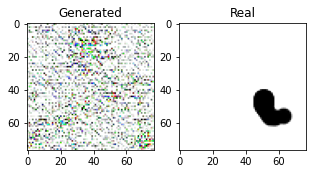

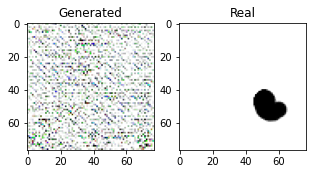

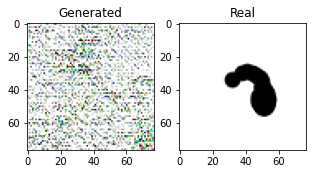

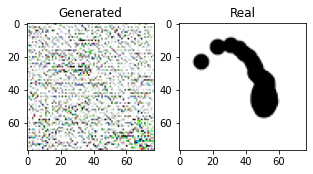

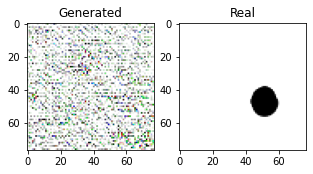

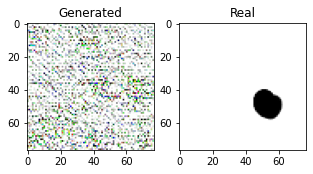

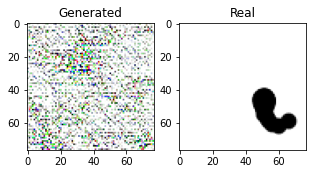

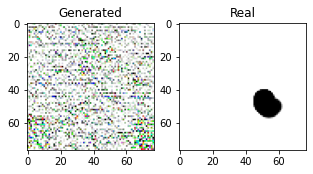

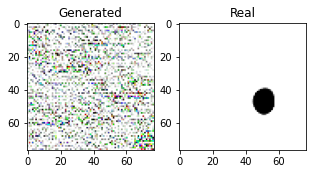

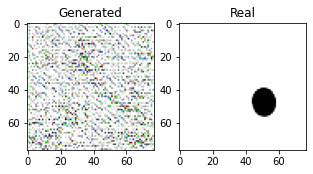

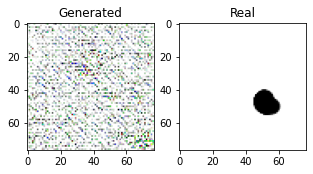

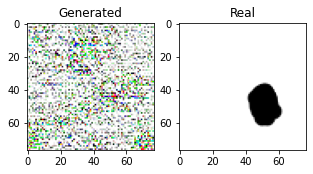

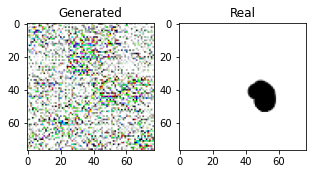

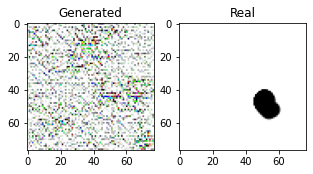

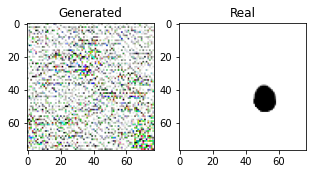

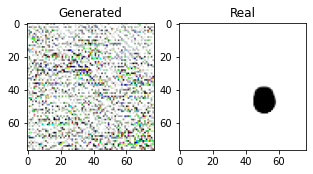

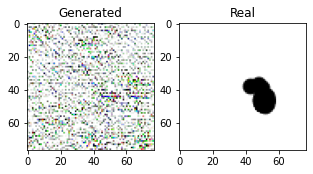

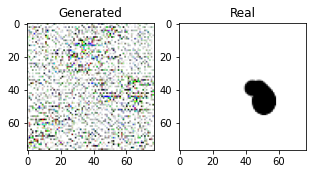

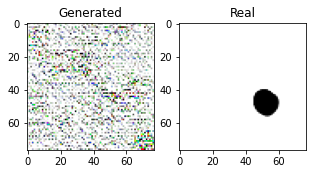

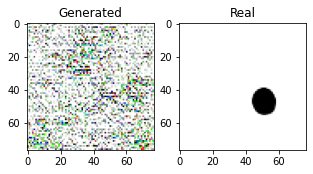

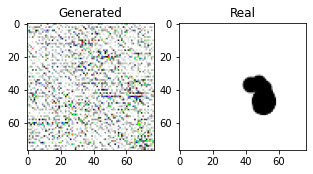

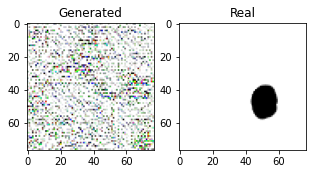

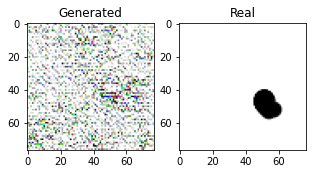

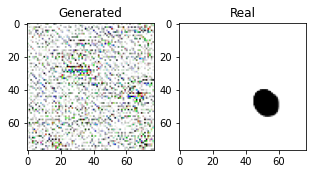

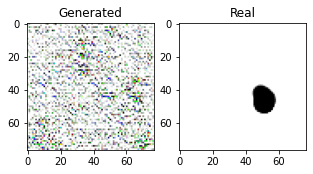

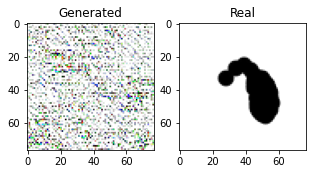

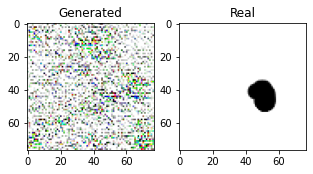

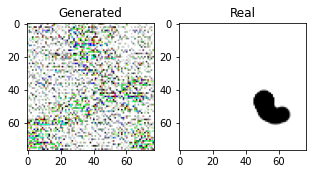

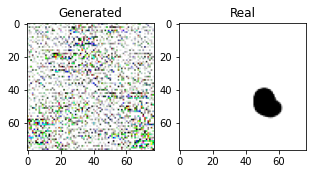

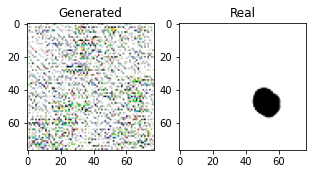

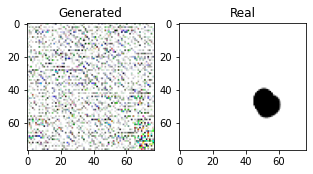

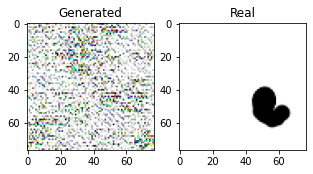

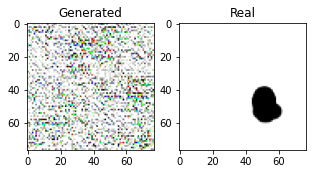

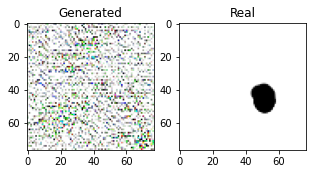

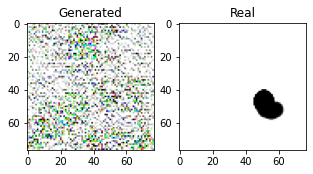

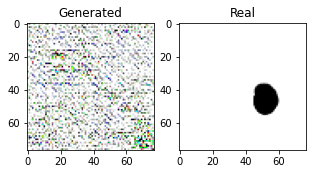

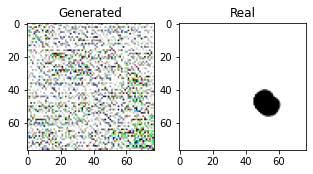

In [ ]:
trainer.run_train(dataset)